In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')


In [5]:
# Step 3: Explore data (optional)
print(df.head())
print(df.info())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [6]:
X = df.select_dtypes(include=['int64', 'float64'])

In [7]:
# Step 5: Data scaling (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Step 6: Use Elbow Method to find optimal k
wcss = []  # Within-Cluster Sum of Squares


In [10]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


/home/iplab/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/iplab/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/iplab/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/iplab/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/iplab/anaconda3/li

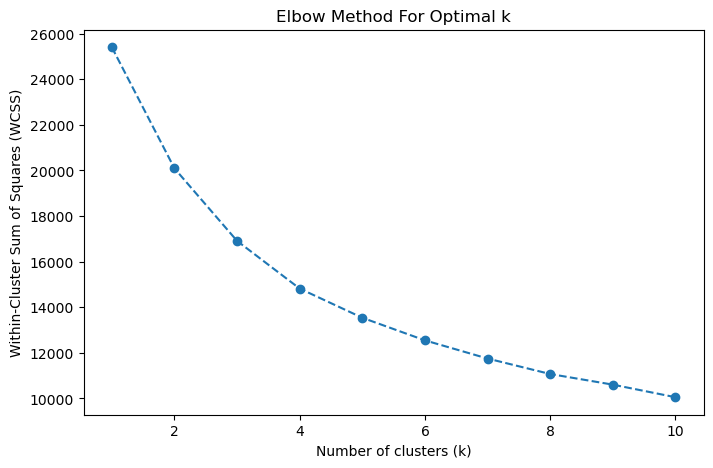

In [11]:
# Step 7: Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [12]:
# Step 8: Based on elbow plot, choose optimal k, say k=3 (replace with your choice)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


/home/iplab/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Step 9: Add cluster labels to original dataframe
df['Cluster'] = clusters

In [14]:
print(df[['Cluster']].head())

   Cluster
0        0
1        1
2        0
3        0
4        0


In [15]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):")
print(pd.DataFrame(centers, columns=X.columns))


Cluster Centers (original scale):
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER        SALES  \
0  10234.411318        35.481419  97.879552         6.532095  4538.086596   
1  10230.394708        33.357222  62.491136         6.732084  2061.890044   
2  10333.155738        36.614754  86.884180         6.030055  3810.655806   

     QTR_ID  MONTH_ID      YEAR_ID        MSRP  
0  3.331081  8.945946  2003.503378  125.754223  
1  3.037486  8.085998  2003.553473   65.706725  
2  1.329235  2.863388  2004.643443  103.594262  
